In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import math
from sklearn.metrics import accuracy_score as acc_sam
from functools import reduce
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.lda import LDA
# from sklearn.qda import QDA
from scipy import linalg
import matplotlib as mpl
from numpy import *
import math
from scipy.stats import multivariate_normal
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier 
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression as LR
import sympy as sp
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
import torch #python #keras #tensorflow #pytorch
import torch.nn as nn
from torch.autograd import Variable

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from math import e,sqrt,sin,cos

import IPython
import numpy as np
import wave
import warnings
warnings.filterwarnings('ignore')
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.decomposition import FastICA

from scipy.io import wavfile

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
import re
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from bs4 import BeautifulSoup
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

# py.init_notebook_mode(connected=True)


import wordcloud
from wordcloud import WordCloud, STOPWORDS
import itertools
import string
import collections
from collections import Counter


import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer



In [10]:
from sklearn.svm import SVC,LinearSVC
from sklearn import set_config
from sklearn.compose import make_column_transformer

In [11]:

# from google.colab import files
 
# #  
# uploaded = files.upload()

In [12]:
data=pd.read_csv('mbti_1.csv')
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [13]:
data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'INTJ's appear to be constantly calm and conte...
freq,1832,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


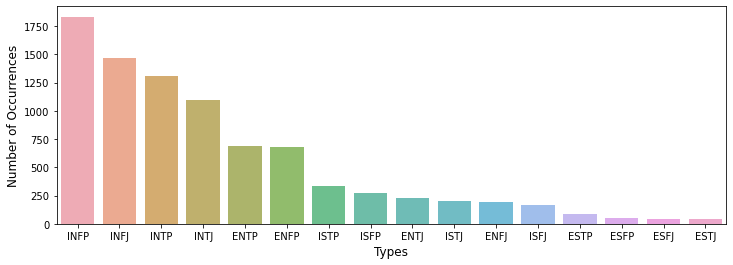

In [15]:
cnt_srs = data['type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Distribution of Lengths of all 50 Posts')

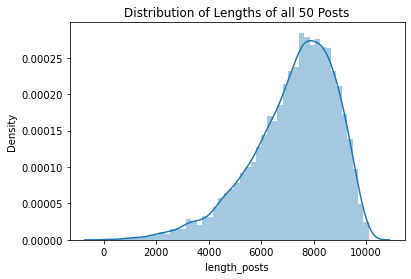

In [16]:
data["length_posts"] = data["posts"].apply(len)
sns.distplot(data["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")

In [17]:
words = list(data["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
wc=pd.DataFrame(Counter(words).most_common(40),columns=['word','count'])

In [18]:
wc

,word,count
0,I,387957
1,to,290168
2,the,270699
3,a,230918
4,and,219498
5,of,177853
6,is,128804
7,you,128750
8,that,127221
9,in,117263


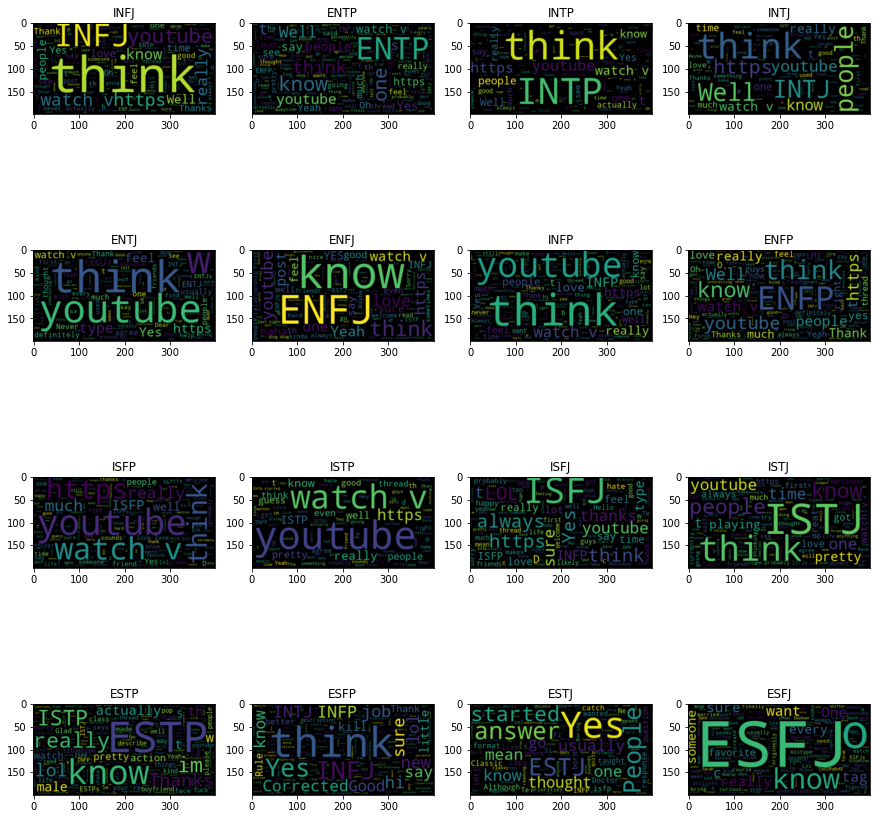

In [19]:
fig, ax = plt.subplots(len(data['type'].unique()), sharex=True, figsize=(15,len(data['type'].unique())))
k = 0
for i in data['type'].unique():
    df_4 = data[data['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [20]:
# !pip install pyaml
import plotly.express as px
px.pie(data,names='type',title='Personality type',hole=0.3)

In [21]:
def extract(posts, new_posts):
    for post in posts[1].split("|||"):
        new_posts.append((posts[0], post))

posts = []
data.apply(lambda x: extract(x, posts), axis=1)
print("Number of users", len(data))
print("Number of posts", len(posts))

Number of users 8675
Number of posts 422845


In [22]:
enc = LabelEncoder()
data['type of encoding'] = enc.fit_transform(data['type'])

target = data['type of encoding'] 
data

,type,posts,length_posts,type of encoding
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4652,8
1,ENTP,'I'm finding the lack of me in these posts ver...,7053,3
2,INTP,'Good one _____ https://www.youtube.com/wat...,5265,11
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6271,10
4,ENTJ,'You're fired.|||That's another silly misconce...,6111,2
...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,5011,13
8671,ENFP,'So...if this thread already exists someplace ...,7902,1
8672,INTP,'So many questions when i do these things. I ...,5772,11
8673,INFP,'I am very conflicted right now when it comes ...,9479,9


In [23]:
class clean:
    def __init__(self,text):
        self.text=text
    def clean_text(self):
        regex = re.compile('[%s]' % re.escape('|'))
        self.text = BeautifulSoup(self.text, "lxml").text
        # self.text = re.sub(r'\|\|\|', r' ', self.text) 
        # self.text = re.sub(r'http\S+', r'<URL>', self.text)
        self.text = regex.sub(" ", self.text)
        words = str(self.text).split()
        words = [i.lower() + " " for i in words]
        words = [i for i in words if not "http" in i]
        words = " ".join(words)
        words = words.translate(words.maketrans('', '', string.punctuation))
        return words

data['cleaned_text'] = data['posts'].apply(clean.clean_text)
data.head()

,type,posts,length_posts,type of encoding,cleaned_text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4652,8,enfp and intj moments sportscenter not t...
1,ENTP,'I'm finding the lack of me in these posts ver...,7053,3,im finding the lack of me in these pos...
2,INTP,'Good one _____ https://www.youtube.com/wat...,5265,11,good one of course to which i say i ...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6271,10,dear intp i enjoyed our conversation the...
4,ENTJ,'You're fired.|||That's another silly misconce...,6111,2,youre fired thats another silly misconcep...


In [24]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAMKIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
train_data,test_data=tts(data,test_size=0.2,random_state=42,stratify=data.type)

In [27]:
# lemmatizer=WordNetLemmatizer()
vectorizer=TfidfVectorizer(max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.cleaned_text)

TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x000002362F5F2940>)

In [28]:
models_accuracy={}

In [29]:
train_post=vectorizer.transform(train_data.cleaned_text).toarray()
test_post=vectorizer.transform(test_data.cleaned_text).toarray()

In [30]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

In [31]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [32]:
scoring = {'acc': 'accuracy',
           'neg_log_loss': 'neg_log_loss',
           'f1_micro': 'f1_micro'}

LR

In [33]:
model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_log.fit(train_post,train_target)

LogisticRegression(C=0.5, max_iter=3000, n_jobs=-1)

In [34]:
print('train classification report \n ',classification_report(train_target,model_log.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.80      0.13      0.23       152
        ENFP       0.81      0.64      0.71       540
        ENTJ       0.94      0.26      0.41       185
        ENTP       0.81      0.65      0.72       548
        ESFJ       0.00      0.00      0.00        34
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       1.00      0.04      0.08        71
        INFJ       0.73      0.82      0.77      1176
        INFP       0.64      0.93      0.76      1465
        INTJ       0.74      0.80      0.77       873
        INTP       0.67      0.86      0.76      1043
        ISFJ       0.89      0.25      0.39       133
        ISFP       0.85      0.21      0.33       217
        ISTJ       0.83      0.24      0.37       164
        ISTP       0.89      0.50      0.64       270

    accuracy                           0.71      

In [35]:
print('test classification report \n',classification_report(test_target,model_log.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
               precision    recall  f1-score   support

        ENFJ       1.00      0.08      0.15        38
        ENFP       0.75      0.53      0.62       135
        ENTJ       0.67      0.13      0.22        46
        ENTP       0.62      0.50      0.56       137
        ESFJ       0.00      0.00      0.00         8
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.63      0.72      0.68       294
        INFP       0.56      0.87      0.68       367
        INTJ       0.61      0.62      0.62       218
        INTP       0.65      0.82      0.73       261
        ISFJ       0.75      0.09      0.16        33
        ISFP       0.80      0.15      0.25        54
        ISTJ       0.50      0.05      0.09        41
        ISTP       0.69      0.36      0.47        67

    accuracy                           0.62      17

In [36]:
models_accuracy['LR']=accuracy_score(test_target,model_log.predict(test_post))

In [37]:
np.random.seed(1)
model_lr = Pipeline([('tfidf1', vectorizer), ('lr', model_log)])

results_lr = cross_validate(model_lr, train_data['cleaned_text'], train_data['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

In [38]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_lr['test_acc']),
                                                          np.std(results_lr['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_lr['test_f1_micro']),
                                                          np.std(results_lr['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_lr['test_neg_log_loss']),
                                                          np.std(-1*results_lr['test_neg_log_loss'])))

CV Accuracy: 0.6004 (+/- 0.0057)
CV F1: 0.6004 (+/- 0.0057)
CV Logloss: 1.5069 (+/- 0.0070)


Linear SVC

In [39]:
model_linear_svc=LinearSVC(C=0.1)
model_linear_svc.fit(train_post,train_target)

LinearSVC(C=0.1)

In [40]:
print('train classification report \n ',classification_report(train_target,model_linear_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))


train classification report 
                precision    recall  f1-score   support

        ENFJ       0.89      0.43      0.58       152
        ENFP       0.85      0.76      0.80       540
        ENTJ       0.92      0.62      0.74       185
        ENTP       0.84      0.80      0.82       548
        ESFJ       0.83      0.29      0.43        34
        ESFP       1.00      0.08      0.15        38
        ESTJ       1.00      0.26      0.41        31
        ESTP       0.91      0.45      0.60        71
        INFJ       0.82      0.84      0.83      1176
        INFP       0.76      0.93      0.84      1465
        INTJ       0.82      0.85      0.84       873
        INTP       0.79      0.89      0.84      1043
        ISFJ       0.91      0.64      0.75       133
        ISFP       0.88      0.56      0.68       217
        ISTJ       0.89      0.66      0.76       164
        ISTP       0.89      0.81      0.85       270

    accuracy                           0.81      

In [41]:
print('test classification report \n',classification_report(test_target,model_linear_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
               precision    recall  f1-score   support

        ENFJ       0.69      0.24      0.35        38
        ENFP       0.76      0.58      0.66       135
        ENTJ       0.60      0.33      0.42        46
        ENTP       0.59      0.53      0.56       137
        ESFJ       1.00      0.38      0.55         8
        ESFP       0.00      0.00      0.00        10
        ESTJ       1.00      0.12      0.22         8
        ESTP       0.67      0.22      0.33        18
        INFJ       0.68      0.72      0.70       294
        INFP       0.61      0.86      0.71       367
        INTJ       0.61      0.62      0.62       218
        INTP       0.70      0.82      0.75       261
        ISFJ       0.67      0.24      0.36        33
        ISFP       0.77      0.31      0.45        54
        ISTJ       0.75      0.29      0.42        41
        ISTP       0.69      0.54      0.61        67

    accuracy                           0.65      17

In [42]:
models_accuracy['LSVC']=accuracy_score(test_target,model_linear_svc.predict(test_post))

In [43]:
np.random.seed(1)
model_lsvc = Pipeline([('tfidf1', vectorizer), ('Linear SVC', model_linear_svc)])

results_lsvc = cross_validate(model_lsvc, train_data['cleaned_text'], train_data['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

In [44]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_lsvc['test_acc']),
                                                          np.std(results_lsvc['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_lsvc['test_f1_micro']),
                                                          np.std(results_lsvc['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_lsvc['test_neg_log_loss']),
                                                          np.std(-1*results_lsvc['test_neg_log_loss'])))

CV Accuracy: nan (+/- nan)
CV F1: nan (+/- nan)
CV Logloss: nan (+/- nan)


In [45]:
results_lsvc

{'fit_time': array([67.33466578, 67.77665591, 67.52565527, 64.2095933 , 64.246665  ]),
 'score_time': array([12.6750617 , 12.30700278, 13.18100572, 14.34999967, 14.23599696]),
 'test_acc': array([nan, nan, nan, nan, nan]),
 'test_neg_log_loss': array([nan, nan, nan, nan, nan]),
 'test_f1_micro': array([nan, nan, nan, nan, nan])}

DTC

In [46]:
model_tree=DTC(max_depth=14)
model_tree.fit(train_post,train_target)

DecisionTreeClassifier(max_depth=14)

In [47]:
print('train classification report \n ',classification_report(train_target,model_tree.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.89      0.43      0.58       152
        ENFP       0.88      0.80      0.84       540
        ENTJ       0.78      0.72      0.75       185
        ENTP       0.92      0.80      0.86       548
        ESFJ       0.88      0.44      0.59        34
        ESFP       0.92      0.32      0.47        38
        ESTJ       1.00      0.26      0.41        31
        ESTP       0.94      0.46      0.62        71
        INFJ       0.89      0.82      0.85      1176
        INFP       0.64      0.96      0.77      1465
        INTJ       0.86      0.84      0.85       873
        INTP       0.89      0.80      0.84      1043
        ISFJ       1.00      0.41      0.59       133
        ISFP       0.94      0.65      0.77       217
        ISTJ       0.71      0.68      0.69       164
        ISTP       0.87      0.71      0.78       270

    accuracy                           0.80      

In [48]:
print('test classification report \n ',classification_report(test_target,model_tree.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
                precision    recall  f1-score   support

        ENFJ       0.14      0.08      0.10        38
        ENFP       0.52      0.41      0.46       135
        ENTJ       0.28      0.28      0.28        46
        ENTP       0.48      0.42      0.45       137
        ESFJ       0.00      0.00      0.00         8
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.22      0.11      0.15        18
        INFJ       0.60      0.58      0.59       294
        INFP       0.47      0.69      0.56       367
        INTJ       0.48      0.51      0.49       218
        INTP       0.62      0.55      0.58       261
        ISFJ       0.38      0.09      0.15        33
        ISFP       0.37      0.19      0.25        54
        ISTJ       0.44      0.34      0.38        41
        ISTP       0.43      0.43      0.43        67

    accuracy                           0.50      1

In [49]:
models_accuracy['DTC']=accuracy_score(test_target,model_tree.predict(test_post))

In [50]:
np.random.seed(1)
model_dtc = Pipeline([('tfidf1', vectorizer), ('dtc', model_tree)])

results_dtc = cross_validate(model_dtc, train_data['cleaned_text'], train_data['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

In [51]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_dtc['test_acc']),
                                                          np.std(results_dtc['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_dtc['test_f1_micro']),
                                                          np.std(results_dtc['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_dtc['test_neg_log_loss']),
                                                          np.std(-1*results_dtc['test_neg_log_loss'])))

CV Accuracy: 0.4741 (+/- 0.0084)
CV F1: 0.4741 (+/- 0.0084)
CV Logloss: 11.3820 (+/- 0.4359)


Random Forest

In [52]:
model_forest=RandomForestClassifier(max_depth=10)
model_forest.fit(train_post,train_target)

RandomForestClassifier(max_depth=10)

In [53]:
print('train classification report \n ',classification_report(train_target,model_forest.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.02      0.04       152
        ENFP       0.98      0.47      0.63       540
        ENTJ       1.00      0.18      0.30       185
        ENTP       0.99      0.53      0.69       548
        ESFJ       0.00      0.00      0.00        34
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       1.00      0.01      0.03        71
        INFJ       0.83      0.83      0.83      1176
        INFP       0.46      1.00      0.63      1465
        INTJ       0.92      0.75      0.83       873
        INTP       0.78      0.88      0.82      1043
        ISFJ       1.00      0.11      0.19       133
        ISFP       1.00      0.09      0.17       217
        ISTJ       1.00      0.07      0.13       164
        ISTP       1.00      0.14      0.25       270

    accuracy                           0.67      

In [54]:
print('test classification report \n ',classification_report(test_target,model_forest.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        38
        ENFP       0.81      0.21      0.34       135
        ENTJ       0.00      0.00      0.00        46
        ENTP       0.81      0.15      0.26       137
        ESFJ       0.00      0.00      0.00         8
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.62      0.55      0.58       294
        INFP       0.34      0.96      0.50       367
        INTJ       0.72      0.35      0.47       218
        INTP       0.61      0.64      0.63       261
        ISFJ       0.00      0.00      0.00        33
        ISFP       0.00      0.00      0.00        54
        ISTJ       0.00      0.00      0.00        41
        ISTP       0.00      0.00      0.00        67

    accuracy                           0.47      1

In [55]:
models_accuracy['RFC']=accuracy_score(test_target,model_forest.predict(test_post))

In [56]:
np.random.seed(1)
model_rfc = Pipeline([('tfidf1', vectorizer), ('rfc', model_forest)])

results_rfc = cross_validate(model_rfc, train_data['cleaned_text'], train_data['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

In [57]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_rfc['test_acc']),
                                                          np.std(results_rfc['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_rfc['test_f1_micro']),
                                                          np.std(results_rfc['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_rfc['test_neg_log_loss']),
                                                          np.std(-1*results_rfc['test_neg_log_loss'])))

CV Accuracy: 0.4542 (+/- 0.0148)
CV F1: 0.4542 (+/- 0.0148)
CV Logloss: 1.9106 (+/- 0.0125)


XGBoost

In [58]:
modelxgb=XGBClassifier(max_depth=7,n_estimators=100)
modelxgb.fit(train_post,train_target)

[12:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [59]:
print('train classification report \n ',classification_report(train_target,modelxgb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      1.00      1.00       152
        ENFP       1.00      1.00      1.00       540
        ENTJ       1.00      1.00      1.00       185
        ENTP       1.00      1.00      1.00       548
        ESFJ       1.00      1.00      1.00        34
        ESFP       1.00      1.00      1.00        38
        ESTJ       1.00      1.00      1.00        31
        ESTP       1.00      1.00      1.00        71
        INFJ       1.00      1.00      1.00      1176
        INFP       1.00      1.00      1.00      1465
        INTJ       1.00      1.00      1.00       873
        INTP       1.00      1.00      1.00      1043
        ISFJ       1.00      1.00      1.00       133
        ISFP       1.00      1.00      1.00       217
        ISTJ       1.00      1.00      1.00       164
        ISTP       1.00      1.00      1.00       270

    accuracy                           1.00      

In [60]:
print('test classification report \n ',classification_report(test_target,modelxgb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
                precision    recall  f1-score   support

        ENFJ       0.67      0.37      0.47        38
        ENFP       0.69      0.60      0.64       135
        ENTJ       0.78      0.46      0.58        46
        ENTP       0.60      0.56      0.58       137
        ESFJ       1.00      0.12      0.22         8
        ESFP       0.50      0.10      0.17        10
        ESTJ       1.00      0.38      0.55         8
        ESTP       0.54      0.39      0.45        18
        INFJ       0.68      0.74      0.71       294
        INFP       0.64      0.78      0.71       367
        INTJ       0.67      0.65      0.66       218
        INTP       0.68      0.76      0.72       261
        ISFJ       0.60      0.45      0.52        33
        ISFP       0.60      0.39      0.47        54
        ISTJ       0.67      0.44      0.53        41
        ISTP       0.68      0.64      0.66        67

    accuracy                           0.66      1

In [61]:
models_accuracy['XGB']=accuracy_score(test_target,modelxgb.predict(test_post))

In [62]:
np.random.seed(1)
model_xgb = Pipeline([('tfidf1', vectorizer), ('xgb', modelxgb)])

results_xgb = cross_validate(model_xgb, train_data['cleaned_text'], train_data['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

In [63]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_xgb['test_acc']),
                                                          np.std(results_xgb['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_xgb['test_f1_micro']),
                                                          np.std(results_xgb['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_xgb['test_neg_log_loss']),
                                                          np.std(-1*results_xgb['test_neg_log_loss'])))

CV Accuracy: 0.6448 (+/- 0.0067)
CV F1: 0.6448 (+/- 0.0067)
CV Logloss: 1.3018 (+/- 0.0296)


Gaussian NB

In [64]:
model_gaussian_nb=GaussianNB()
model_gaussian_nb.fit(train_post,train_target)

GaussianNB()

In [65]:
print('train classification report \n ',classification_report(train_target,model_gaussian_nb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.63      1.00      0.77       152
        ENFP       0.60      0.74      0.67       540
        ENTJ       0.43      0.98      0.60       185
        ENTP       0.72      0.66      0.69       548
        ESFJ       0.92      1.00      0.96        34
        ESFP       0.81      1.00      0.89        38
        ESTJ       0.97      1.00      0.98        31
        ESTP       0.88      1.00      0.93        71
        INFJ       0.84      0.56      0.67      1176
        INFP       0.84      0.57      0.68      1465
        INTJ       0.74      0.61      0.67       873
        INTP       0.82      0.56      0.67      1043
        ISFJ       0.75      0.99      0.85       133
        ISFP       0.42      0.95      0.58       217
        ISTJ       0.62      0.99      0.76       164
        ISTP       0.32      0.91      0.47       270

    accuracy                           0.67      

In [66]:
print('test classification report \n ',classification_report(test_target,model_gaussian_nb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        38
        ENFP       0.18      0.21      0.20       135
        ENTJ       0.04      0.07      0.05        46
        ENTP       0.25      0.23      0.24       137
        ESFJ       0.00      0.00      0.00         8
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.37      0.30      0.33       294
        INFP       0.41      0.32      0.36       367
        INTJ       0.24      0.25      0.25       218
        INTP       0.34      0.30      0.32       261
        ISFJ       0.00      0.00      0.00        33
        ISFP       0.05      0.09      0.06        54
        ISTJ       0.07      0.05      0.06        41
        ISTP       0.08      0.25      0.12        67

    accuracy                           0.24      1

In [67]:
models_accuracy['Gaussian Naive Bayes']=accuracy_score(test_target,model_gaussian_nb.predict(test_post))

In [68]:
np.random.seed(1)
model_gnb = Pipeline([('tfidf1', vectorizer), ('gnb', model_gaussian_nb)])

results_gnb = cross_validate(model_gnb, train_data['cleaned_text'], train_data['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

In [69]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_gnb['test_acc']),
                                                          np.std(results_gnb['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_gnb['test_f1_micro']),
                                                          np.std(results_gnb['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_gnb['test_neg_log_loss']),
                                                          np.std(-1*results_gnb['test_neg_log_loss'])))

CV Accuracy: nan (+/- nan)
CV F1: nan (+/- nan)
CV Logloss: nan (+/- nan)


Multinomial NB

In [70]:
model_multinomial_nb=MultinomialNB()
model_multinomial_nb.fit(train_post,train_target)

MultinomialNB()

In [71]:
print('train classification report \n ',classification_report(train_target,model_multinomial_nb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       152
        ENFP       0.90      0.02      0.03       540
        ENTJ       0.00      0.00      0.00       185
        ENTP       0.94      0.06      0.12       548
        ESFJ       0.00      0.00      0.00        34
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       0.00      0.00      0.00        71
        INFJ       0.53      0.62      0.57      1176
        INFP       0.35      0.95      0.51      1465
        INTJ       0.79      0.41      0.54       873
        INTP       0.59      0.63      0.61      1043
        ISFJ       0.00      0.00      0.00       133
        ISFP       0.00      0.00      0.00       217
        ISTJ       0.00      0.00      0.00       164
        ISTP       1.00      0.00      0.01       270

    accuracy                           0.46      

In [72]:
print('test classification report \n ',classification_report(test_target,model_multinomial_nb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        38
        ENFP       0.71      0.04      0.07       135
        ENTJ       0.00      0.00      0.00        46
        ENTP       0.75      0.02      0.04       137
        ESFJ       0.00      0.00      0.00         8
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.39      0.41      0.40       294
        INFP       0.31      0.92      0.46       367
        INTJ       0.68      0.18      0.29       218
        INTP       0.51      0.53      0.52       261
        ISFJ       0.00      0.00      0.00        33
        ISFP       0.00      0.00      0.00        54
        ISTJ       0.00      0.00      0.00        41
        ISTP       0.00      0.00      0.00        67

    accuracy                           0.37      1

In [73]:
models_accuracy['Multinomial Naive Bayes']=accuracy_score(test_target,model_multinomial_nb.predict(test_post))

In [74]:
np.random.seed(1)
model_mnb = Pipeline([('tfidf1', vectorizer), ('xgb', model_multinomial_nb)])

results_mnb = cross_validate(model_mnb, train_data['cleaned_text'], train_data['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

In [75]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_mnb['test_acc']),
                                                          np.std(results_mnb['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_mnb['test_f1_micro']),
                                                          np.std(results_mnb['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_mnb['test_neg_log_loss']),
                                                          np.std(-1*results_mnb['test_neg_log_loss'])))

CV Accuracy: 0.3552 (+/- 0.0071)
CV F1: 0.3552 (+/- 0.0071)
CV Logloss: 2.3185 (+/- 0.0087)


MLP

In [76]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=150).fit(train_post,train_target)


In [77]:
print('train classification report \n ',classification_report(train_target,clf.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      1.00      1.00       152
        ENFP       1.00      1.00      1.00       540
        ENTJ       1.00      1.00      1.00       185
        ENTP       1.00      1.00      1.00       548
        ESFJ       1.00      1.00      1.00        34
        ESFP       1.00      1.00      1.00        38
        ESTJ       1.00      1.00      1.00        31
        ESTP       1.00      1.00      1.00        71
        INFJ       1.00      1.00      1.00      1176
        INFP       1.00      1.00      1.00      1465
        INTJ       1.00      1.00      1.00       873
        INTP       1.00      1.00      1.00      1043
        ISFJ       1.00      1.00      1.00       133
        ISFP       1.00      1.00      1.00       217
        ISTJ       1.00      1.00      1.00       164
        ISTP       1.00      1.00      1.00       270

    accuracy                           1.00      

In [78]:
print('test classification report \n ',classification_report(test_target,clf.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
                precision    recall  f1-score   support

        ENFJ       0.68      0.39      0.50        38
        ENFP       0.54      0.53      0.54       135
        ENTJ       0.45      0.28      0.35        46
        ENTP       0.49      0.45      0.47       137
        ESFJ       1.00      0.25      0.40         8
        ESFP       0.00      0.00      0.00        10
        ESTJ       1.00      0.25      0.40         8
        ESTP       0.50      0.28      0.36        18
        INFJ       0.55      0.61      0.58       294
        INFP       0.58      0.67      0.62       367
        INTJ       0.49      0.53      0.51       218
        INTP       0.56      0.66      0.61       261
        ISFJ       0.73      0.33      0.46        33
        ISFP       0.71      0.41      0.52        54
        ISTJ       0.63      0.29      0.40        41
        ISTP       0.62      0.49      0.55        67

    accuracy                           0.55      1

In [79]:
models_accuracy['MLP']=accuracy_score(test_target,clf.predict(test_post))

In [80]:
np.random.seed(1)
model_mlp = Pipeline([('tfidf1', vectorizer), ('gnb', clf)])

results_mlp = cross_validate(model_mlp, train_data['cleaned_text'], train_data['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

In [81]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_mlp['test_acc']),
                                                          np.std(results_mlp['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_mlp['test_f1_micro']),
                                                          np.std(results_mlp['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_mlp['test_neg_log_loss']),
                                                          np.std(-1*results_mlp['test_neg_log_loss'])))

CV Accuracy: 0.5630 (+/- 0.0142)
CV F1: 0.5630 (+/- 0.0142)
CV Logloss: 1.9802 (+/- 0.0333)


Poly SVC

In [82]:
from sklearn.svm import SVC
svq=SVC(kernel='poly').fit(train_post,train_target)

In [83]:
print('train classification report \n ',classification_report(train_target,svq.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.99      1.00       152
        ENFP       1.00      1.00      1.00       540
        ENTJ       1.00      1.00      1.00       185
        ENTP       1.00      0.99      1.00       548
        ESFJ       1.00      0.97      0.99        34
        ESFP       1.00      0.95      0.97        38
        ESTJ       1.00      1.00      1.00        31
        ESTP       1.00      0.99      0.99        71
        INFJ       1.00      0.99      1.00      1176
        INFP       0.99      1.00      0.99      1465
        INTJ       0.99      1.00      1.00       873
        INTP       1.00      1.00      1.00      1043
        ISFJ       1.00      1.00      1.00       133
        ISFP       1.00      0.99      1.00       217
        ISTJ       1.00      1.00      1.00       164
        ISTP       1.00      0.99      0.99       270

    accuracy                           1.00      

In [84]:
print('test classification report \n ',classification_report(test_target,svq.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
                precision    recall  f1-score   support

        ENFJ       0.75      0.08      0.14        38
        ENFP       0.77      0.36      0.49       135
        ENTJ       0.67      0.04      0.08        46
        ENTP       0.66      0.31      0.42       137
        ESFJ       0.50      0.12      0.20         8
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.66      0.63      0.64       294
        INFP       0.44      0.89      0.59       367
        INTJ       0.64      0.54      0.59       218
        INTP       0.57      0.81      0.67       261
        ISFJ       0.75      0.09      0.16        33
        ISFP       0.50      0.04      0.07        54
        ISTJ       0.33      0.02      0.05        41
        ISTP       0.53      0.12      0.20        67

    accuracy                           0.55      1

In [85]:
models_accuracy['Poly SVC']=accuracy_score(test_target,svq.predict(test_post))

In [86]:
np.random.seed(1)
model_psvc = Pipeline([('tfidf1', vectorizer), ('svq', svq)])

results_psvc = cross_validate(model_psvc, train_data['cleaned_text'], train_data['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

In [87]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_psvc['test_acc']),
                                                          np.std(results_psvc['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_psvc['test_f1_micro']),
                                                          np.std(results_psvc['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_psvc['test_neg_log_loss']),
                                                          np.std(-1*results_psvc['test_neg_log_loss'])))

CV Accuracy: nan (+/- nan)
CV F1: nan (+/- nan)
CV Logloss: nan (+/- nan)


Comparison

In [88]:
models_accuracy

{'LR': 0.6167146974063401,
 'LSVC': 0.6530259365994237,
 'DTC': 0.49971181556195965,
 'RFC': 0.46512968299711815,
 'XGB': 0.6610951008645534,
 'Gaussian Naive Bayes': 0.24438040345821327,
 'Multinomial Naive Bayes': 0.37060518731988473,
 'MLP': 0.5538904899135446,
 'Poly SVC': 0.5481268011527377}

In [89]:
accuarcy=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])

In [90]:
accuarcy.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,XGB,0.661095
1,LSVC,0.653026
2,LR,0.616715
3,MLP,0.553890
4,Poly SVC,0.548127
5,DTC,0.499712
6,RFC,0.465130
7,Multinomial Naive Bayes,0.370605
8,Gaussian Naive Bayes,0.244380


In [91]:
cv_acc=[]
cv_acc.append(np.mean(results_lr['test_acc']))
cv_acc.append(np.mean(results_lsvc['test_acc']))
# cv_acc.append(0)
cv_acc.append(np.mean(results_dtc['test_acc']))
cv_acc.append(np.mean(results_rfc['test_acc']))
cv_acc.append(np.mean(results_xgb['test_acc']))
cv_acc.append(np.mean(results_gnb['test_acc']))
# cv_acc.append(0)
cv_acc.append(np.mean(results_mnb['test_acc']))
cv_acc.append(np.mean(results_mlp['test_acc']))
cv_acc.append(np.mean(results_psvc['test_acc']))

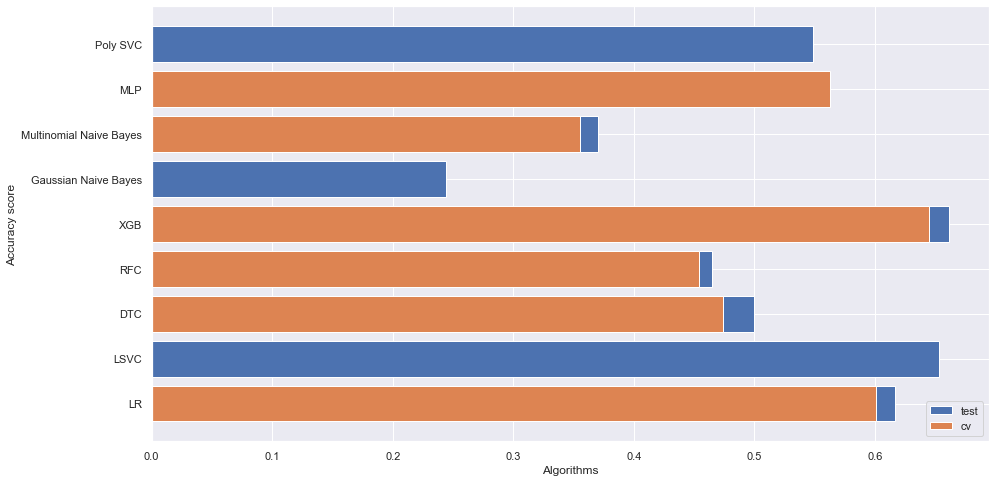

In [92]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# type(list(models_accuracy.keys()))
# x_axis = np.arange(len(list(models_accuracy.keys())))
plt.barh(list(models_accuracy.keys()),list(models_accuracy.values()),label='test')
plt.barh(list(models_accuracy.keys()),list(cv_acc),label='cv')
# plt.xticks(x_axis,list(models_accuracy.keys()))
plt.legend()
plt.show()
# sns.barplot(list(models_accuracy.keys()),list(models_accuracy.values()))
# sns.barplot(accuarcy)

Hyperparameter Tuning on best model

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:

params = {
        'penalty' : ['l1','l2'],
        'C' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5],
        'multi_class': ['ovr', 'crammer_singer'],
        'class_weight' : ['balanced'],
        'max_iter' : [1000]
        }
final1 = GridSearchCV(model_linear_svc, params, n_jobs=-1, cv=3)
final1.fit(train_post, train_target)
print('Best parameters found:\n', final1.best_params_)

Best parameters found:
 {'C': 0.2, 'class_weight': 'balanced', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2'}


In [95]:
final_1=LinearSVC(C=0.2,class_weight='balanced',max_iter=1000,multi_class='ovr',penalty='l2')
final_1.fit(train_post,train_target)


LinearSVC(C=0.2, class_weight='balanced')

In [96]:
# params = {
#     'n_estimators':[100,500,1000],
#     'max_depth': [5,10,15]
#     }
# final2 = GridSearchCV(modelxgb, params, n_jobs=-1, cv=3)
# final2.fit(train_post, train_target)
# print('Best parameters found:\n',final2.best_params_)

In [97]:
# final_2=XGBClassifier()
# final_2.fit(train_post, train_target)

Conclusion report

LSVC

In [98]:
print('train classification report \n ',classification_report(train_target,final_1.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.78      0.97      0.86       152
        ENFP       0.86      0.86      0.86       540
        ENTJ       0.84      0.94      0.89       185
        ENTP       0.84      0.89      0.86       548
        ESFJ       0.72      1.00      0.84        34
        ESFP       0.59      1.00      0.75        38
        ESTJ       0.91      1.00      0.95        31
        ESTP       0.81      1.00      0.89        71
        INFJ       0.91      0.82      0.86      1176
        INFP       0.92      0.87      0.89      1465
        INTJ       0.89      0.85      0.87       873
        INTP       0.90      0.87      0.88      1043
        ISFJ       0.82      0.97      0.89       133
        ISFP       0.81      0.94      0.87       217
        ISTJ       0.84      0.98      0.90       164
        ISTP       0.84      0.97      0.90       270

    accuracy                           0.88      

In [99]:
print('test classification report \n ',classification_report(test_target,final_1.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
                precision    recall  f1-score   support

        ENFJ       0.49      0.66      0.56        38
        ENFP       0.64      0.60      0.62       135
        ENTJ       0.44      0.65      0.53        46
        ENTP       0.58      0.58      0.58       137
        ESFJ       0.33      0.38      0.35         8
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.67      0.75      0.71         8
        ESTP       0.40      0.67      0.50        18
        INFJ       0.80      0.67      0.73       294
        INFP       0.79      0.73      0.76       367
        INTJ       0.66      0.60      0.63       218
        INTP       0.77      0.74      0.75       261
        ISFJ       0.59      0.67      0.63        33
        ISFP       0.45      0.59      0.51        54
        ISTJ       0.48      0.63      0.55        41
        ISTP       0.55      0.79      0.65        67

    accuracy                           0.67      1

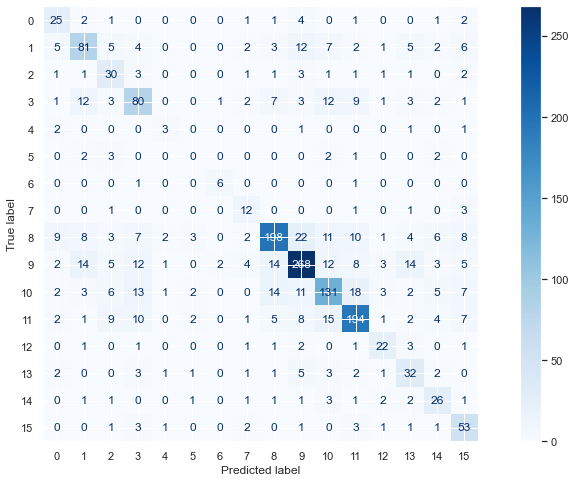

In [100]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_1,test_post,test_target,cmap=plt.cm.Blues)

In [101]:
print(confusion_matrix(final_1.predict(test_post),test_target))

[[ 25   5   1   1   2   0   0   0   9   2   2   2   0   2   0   0]
 [  2  81   1  12   0   2   0   0   8  14   3   1   1   0   1   0]
 [  1   5  30   3   0   3   0   1   3   5   6   9   0   0   1   1]
 [  0   4   3  80   0   0   1   0   7  12  13  10   1   3   0   3]
 [  0   0   0   0   3   0   0   0   2   1   1   0   0   1   0   1]
 [  0   0   0   0   0   0   0   0   3   0   2   2   0   1   1   0]
 [  0   0   0   1   0   0   6   0   0   2   0   0   0   0   0   0]
 [  1   2   1   2   0   0   0  12   2   4   0   1   1   1   1   2]
 [  1   3   1   7   0   0   0   0 198  14  14   5   1   1   1   0]
 [  4  12   3   3   1   0   0   0  22 268  11   8   2   5   1   1]
 [  0   7   1  12   0   2   0   0  11  12 131  15   0   3   3   0]
 [  1   2   1   9   0   1   1   1  10   8  18 194   1   2   1   3]
 [  0   1   1   1   0   0   0   0   1   3   3   1  22   1   2   1]
 [  0   5   1   3   1   0   0   1   4  14   2   2   3  32   2   1]
 [  1   2   0   2   0   2   0   0   6   3   5   4   0   2  26 

XGB

In [102]:
print('train classification report \n ',classification_report(train_target,modelxgb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      1.00      1.00       152
        ENFP       1.00      1.00      1.00       540
        ENTJ       1.00      1.00      1.00       185
        ENTP       1.00      1.00      1.00       548
        ESFJ       1.00      1.00      1.00        34
        ESFP       1.00      1.00      1.00        38
        ESTJ       1.00      1.00      1.00        31
        ESTP       1.00      1.00      1.00        71
        INFJ       1.00      1.00      1.00      1176
        INFP       1.00      1.00      1.00      1465
        INTJ       1.00      1.00      1.00       873
        INTP       1.00      1.00      1.00      1043
        ISFJ       1.00      1.00      1.00       133
        ISFP       1.00      1.00      1.00       217
        ISTJ       1.00      1.00      1.00       164
        ISTP       1.00      1.00      1.00       270

    accuracy                           1.00      

In [103]:
print('test classification report \n ',classification_report(test_target,modelxgb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
                precision    recall  f1-score   support

        ENFJ       0.67      0.37      0.47        38
        ENFP       0.69      0.60      0.64       135
        ENTJ       0.78      0.46      0.58        46
        ENTP       0.60      0.56      0.58       137
        ESFJ       1.00      0.12      0.22         8
        ESFP       0.50      0.10      0.17        10
        ESTJ       1.00      0.38      0.55         8
        ESTP       0.54      0.39      0.45        18
        INFJ       0.68      0.74      0.71       294
        INFP       0.64      0.78      0.71       367
        INTJ       0.67      0.65      0.66       218
        INTP       0.68      0.76      0.72       261
        ISFJ       0.60      0.45      0.52        33
        ISFP       0.60      0.39      0.47        54
        ISTJ       0.67      0.44      0.53        41
        ISTP       0.68      0.64      0.66        67

    accuracy                           0.66      1

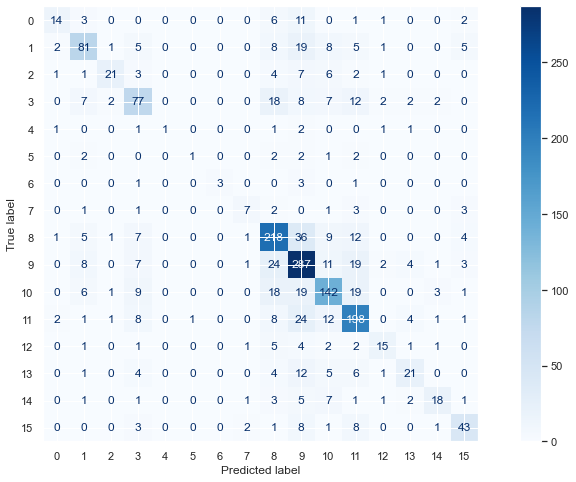

In [104]:
plot_confusion_matrix(modelxgb,test_post,test_target,cmap=plt.cm.Blues)

In [105]:
print(confusion_matrix(modelxgb.predict(test_post),test_target))

[[ 14   2   1   0   1   0   0   0   1   0   0   2   0   0   0   0]
 [  3  81   1   7   0   2   0   1   5   8   6   1   1   1   1   0]
 [  0   1  21   2   0   0   0   0   1   0   1   1   0   0   0   0]
 [  0   5   3  77   1   0   1   1   7   7   9   8   1   4   1   3]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   7   1   1   0   0   1   0   1   2]
 [  6   8   4  18   1   2   0   2 218  24  18   8   5   4   3   1]
 [ 11  19   7   8   2   2   3   0  36 287  19  24   4  12   5   8]
 [  0   8   6   7   0   1   0   1   9  11 142  12   2   5   7   1]
 [  1   5   2  12   0   2   1   3  12  19  19 198   2   6   1   8]
 [  1   1   1   2   1   0   0   0   0   2   0   0  15   1   1   0]
 [  0   0   0   2   1   0   0   0   0   4   0   4   1  21   2   0]
 [  0   0   0   2   0   0   0   0   0   1   3   1   1   0  18 

Saving Model

In [106]:
import pickle

In [107]:
pickle.dump(final1, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

In [118]:
print("Accuracy of the Loaded Model is : " , accuracy_score(test_target,model.predict(test_post)))

Accuracy of the Loaded Model is :  0.669164265129683


In [113]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

<Figure size 864x864 with 0 Axes>

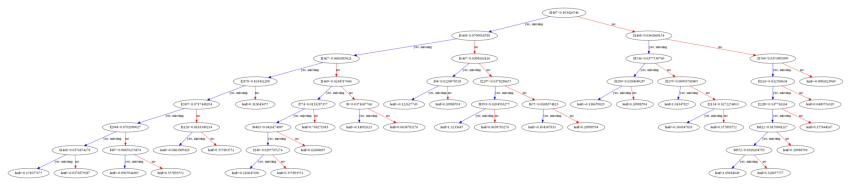

In [116]:
from xgboost import plot_tree
plt.figure(figsize=(12,12))
plot_tree(modelxgb)
plt.savefig('tree_high_dpi', dpi=1000)

Pipeline

In [ ]:
class Pipeline():
    def __init__(self, model, train, test, target, cleaner):
        print("Initializing Pipeline...", end=" ")
        self.model = model.lower()
        self.train = train
        self.test = test
        self.target = target
        self.cleaner = cleaner.lower()
        self.MODEL = None   # This will be the model object
        print("✔")
    def __set_inputs(self):
        print("Setting up the Pipeline...", end = " ")
        if self.model == "vectortizer":
            self.MODEL = vectorizer()
        print("✔")
    def __preprocessing(self):
        print("Preprocessing Data...", end = " ")
        # Converting dataset to correct format
        self.train.dropna(inplace = True)
        self.train.reset_index(inplace = True)
        self.features = [i for i in self.train.columns if i != self.target]
        self.LE = LabelEncoder()    # Label Encoding
        self.LE.fit(self.train[self.target])
        self.train[self.target] = self.LE.transform(self.train[self.target])
        self.cleaner=clean().clean_text
        self.train[self.features]=self.train[self.features].apply(self.cleaner)
        self.test.dropna(inplace = True)
        self.test.reset_index(inplace = True)

        print("✔")

    def __set_params(self):
        if self.model == "vectorizer":
            self.MODEL = TfidfVectorizer()
        elif self.model == "lsvc": 
            self.MODEL = LinearSVC(C=0.2,class_weight='balanced',max_iter=1000,multi_class='ovr',penalty='l2') 
    
    def __train_model(self):
        print("Training Model...", end = " ")
        self.MODEL.fit(self.train[self.features], self.train[self.target])
        print("✔")
    
    def evaluate(self):
        try:
            self.__set_inputs()
            self.__preprocessing()
            self.__set_params()
            self.__train_model()
            print("Evaluating Model...", end = "")
            pred = self.MODEL.predict(self.test[self.features])
            # Storing predictions in a CSV file
            predictions = pd.DataFrame(self.LE.inverse_transform(pred), columns = ["Activity"])
            predictions.to_csv("predictions.csv", index = False)
            # Obtaining the metrics
            acc = accuracy_score(self.test[self.target], pred)
            cr = classification_report(self.test[self.target], pred, target_names=self.LE.classes_)
            print("✔")
            # Printing the metrics
            print("Results:\n\nAccuracy on Test Dataset:", str(np.around(acc, decimals=4)*100)+"%")
            print("Classification Report:\n", cr)
        except:
            print("Error!\n\nInvalid Parameters")   # Error handling

In [ ]:
np.random.seed(1)
model_psvc = Pipeline([('tfidf1', vectorizer), ('final',final_1)])
model_psvc = Pipeline(vectorizer,train_post,test_post,'type',cleaner=clean())

Transformer

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 4.8 MB/s 
     |████████████████████████████████| 596 kB 51.2 MB/s 
     |████████████████████████████████| 6.6 MB 42.6 MB/s 
     |████████████████████████████████| 77 kB 5.6 MB/s 
     |████████████████████████████████| 895 kB 57.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import transformers
import tensorflow as tf
tokenizer = transformers.AutoTokenizer.from_pretrained('bert-large-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
maxlen = 1500

train_input_ids = [tokenizer.encode(str(i), max_length = maxlen , pad_to_max_length = True) for i in train_data.cleaned_text.values]
val_input_ids = [tokenizer.encode(str(i), max_length = maxlen , pad_to_max_length = True) for i in test_data.cleaned_text.values]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
def create_model(): 
    input_word_ids = tf.keras.layers.Input(shape=(maxlen,), dtype=tf.int32,
                                           name="input_word_ids")
    bert_layer = transformers.TFBertModel.from_pretrained('bert-large-uncased')
    bert_outputs = bert_layer(input_word_ids)[0]
    pred = tf.keras.layers.Dense(16, activation='softmax')(bert_outputs[:,0,:])
    
    model = tf.keras.models.Model(inputs=input_word_ids, outputs=pred)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])
    return model

In [ ]:
use_tpu = True
if use_tpu:
    # Create distribution strategy
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)

    # Create model
    with strategy.scope():
        model = create_model()
else:
    model = create_model()
    
model.summary()


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.2.104.250:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.2.104.250:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Downloading:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

In [ ]:
train_data['type_index']=train_data['type of encoding']

In [ ]:
train_data

In [ ]:
test_data['type_index']=test_data['type of encoding']

In [ ]:
one_hot_labels = tf.keras.utils.to_categorical(train_data.type_index.values, num_classes=16)
val_labels= tf.keras.utils.to_categorical(test_data.type_index.values, num_classes=16)

In [ ]:
model=create_model()

In [ ]:
batch_size = 16
model.fit(np.array(train_input_ids), one_hot_labels,validation_data = (np.array(val_input_ids), val_labels),
          verbose = 1, epochs = 20, batch_size = batch_size,  callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5)])

In [ ]:
test_input_ids = [tokenizer.encode(str(i), max_length = maxlen , pad_to_max_length = True) for i in test_data.cleaned_text.values]
test_labels= tf.keras.utils.to_categorical(test_data.type_index.values, num_classes=16)

In [ ]:
model.evaluate(np.array(test_input_ids), test_labels)